In [56]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("Air-Quality.csv")
df.head()

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,75571,1/1/2024,Pittsburgh,NO2_500,9,Good,NaN,NaN
1,75572,1/1/2024,Pittsburgh,PM10_640,10,Good,NaN,NaN
2,75573,1/1/2024,North Braddock,PM25_640,19,Good,NaN,NaN
3,75574,1/1/2024,Parkway East,PM25_640,20,Good,NaN,NaN
4,75575,1/1/2024,Lawrenceville 2,SO2,0,Good,NaN,NaN


In [58]:
print((df["description"]).unique())

['Good' 'Moderate' 'Unhealthy for Sensitive Groups']


In [60]:
df2 = df[(df['description'] == 'Moderate') | (df['description'] == 'Unhealthy for Sensitive Groups')]
df2.head()

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
131,75724,1/6/2024,Pittsburgh,PM25_640,55,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...
159,75763,1/8/2024,North Braddock,PM25_640,57,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...
160,75764,1/8/2024,Parkway East,PM25_640,55,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...
171,75775,1/8/2024,Avalon,PM25_640,59,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...
172,75776,1/8/2024,Liberty,PM25_640,56,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...


In [62]:
new_df = df2[['site', 'description']]
new_df.head()

,site,description
131,Pittsburgh,Moderate
159,North Braddock,Moderate
160,Parkway East,Moderate
171,Avalon,Moderate
172,Liberty,Moderate


<Axes: xlabel='site'>

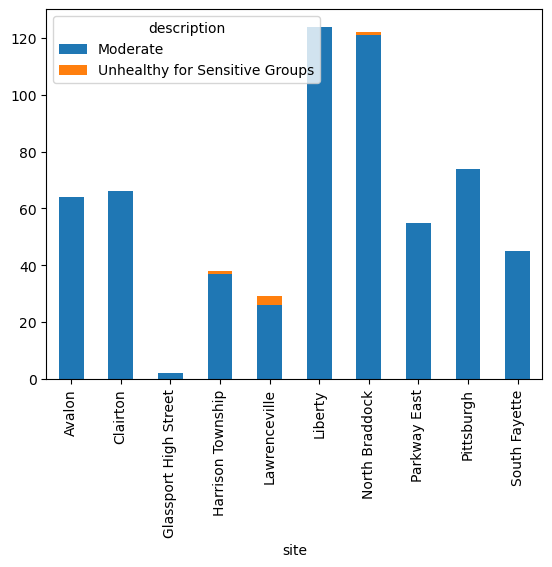

In [64]:
counts = new_df.groupby(['site', 'description']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked = True)